## LINK DE GOOGLE DONDE ESTA EL NOTEBOOK MEJJOR DESARROLLADO
https://drive.google.com/drive/folders/1jTUGKkMWhO-fcXlVW61CNMnabV3X93U7

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import os
from sklearn.linear_model import ElasticNetCV
import math
from sklearn.preprocessing import StandardScaler

ruta_archivo = "/Users/ocamilot/Downloads/trainReg.txt"
ruta_archivo_test = "/Users/ocamilot/Downloads/testReg.txt"
df = pd.read_csv(ruta_archivo)
df_test = pd.read_csv(ruta_archivo_test)



/var/folders/4t/gjw0glxj55s27z96j8ljprn40000gs/T/ipykernel_25653/455189332.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
2024-03-07 09:07:26.102841: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
XTotal = df.loc[:,df.columns!="V1"]
XTotal = XTotal.drop(columns=['V4']) #Eliminar columna V4 ya que tiene solo valores 0
yTotal = df.loc[:,df.columns=="V1"]
XTrain, XTest, yTrain, yTest = train_test_split(XTotal, yTotal, test_size=0.33, random_state=0)
yTest = yTest.values

XTest_final = df_test.loc[:,df.columns!="V1"]
XTest_final = XTest_final.drop(columns=['V4'])




In [3]:
def estandarizar_variables(XTrain):
    scaler = StandardScaler(with_mean=True, with_std=True)
    scaler.fit(XTrain)
    XEscaladoTrain=scaler.transform(XTrain)
    XEscaladoTrain=pd.DataFrame(XEscaladoTrain)
    return XEscaladoTrain

## REDES NEURONALES

In [ ]:
reg = MLPRegressor(random_state=1, max_iter=10000, hidden_layer_sizes=(5, 2),solver='lbfgs', alpha=1e-5)
reg.fit(XTrain, yTrain)
predicciones=reg.predict(XTest)
MSE=np.average(np.square(predicciones-yTest))
RMSE = math.sqrt(MSE)
print('RMSE regresión con Redes Neuronales es:')
print(RMSE)


## ELASTIC NET BASICO

In [ ]:
n_alphas = 200
#XTrain = estandarizar_variables(XTrain)
alphasCalibrar = np.logspace(-10, 2, n_alphas)
modeloElastic = ElasticNetCV(alphas=alphasCalibrar,cv=5, random_state=0).fit(XTrain,yTrain)

#XTest = estandarizar_variables(XTest)
prediccionElastic=modeloElastic.predict(XTest)

RMSEElastic=math.sqrt(np.average(np.square(prediccionElastic-yTest)))
print('RMSE regresión con penalización tipo Elastic Net:')
print(RMSEElastic)

## Modelo de regresion lineal con 25 variables


In [ ]:
from sklearn.linear_model import LinearRegression

primeras_25_variables = XTrain.iloc[:, :25]
primeras_25_variables = estandarizar_variables(primeras_25_variables)

LR = LinearRegression()
LR.fit(primeras_25_variables, yTrain)

primeras_25_variables_xtest = XTest.iloc[:, :25]
primeras_25_variables_xtest = estandarizar_variables(primeras_25_variables_xtest)

prediccion=LR.predict(primeras_25_variables_xtest)
RMSElr=math.sqrt(np.average(np.square(prediccion-yTest)))
print('RMSE regresión lneal es:')
print(RMSElr)



## PCA Y PLS

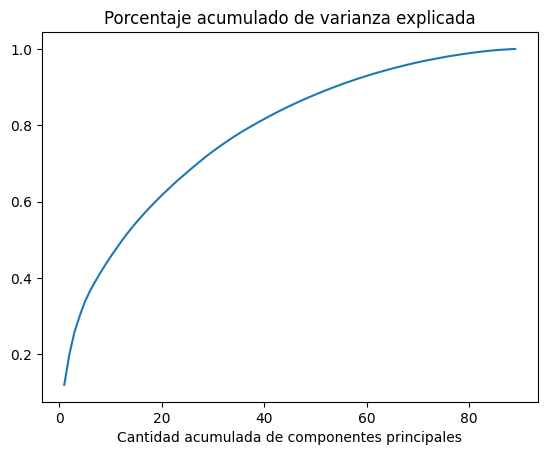

In [7]:
#PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression

scaler = StandardScaler()
scaler.fit(XTrain)
XEscaladoTrain=scaler.transform(XTrain)

p=len(XEscaladoTrain[1,])
pca = PCA(n_components=p).fit(XEscaladoTrain)
A=pca.components_
varianzaExplicada=pca.explained_variance_
porcentajeVarianzaExplicada=pca.explained_variance_ratio_
plt.plot(range(1,p+1),np.cumsum(porcentajeVarianzaExplicada))
plt.xlabel('Cantidad acumulada de componentes principales')
plt.title('Porcentaje acumulado de varianza explicada')
plt.show()


In [82]:
nComponentesElegidas=89

ZTotalTrain=np.matmul(XEscaladoTrain,A)
ZTrain = ZTotalTrain[:,range(nComponentesElegidas)]

regPCA = LinearRegression()
regPCA.fit(ZTrain, yTrain)

XEscaladoTest=scaler.transform(XTest)

ZTotalTest=np.matmul(XEscaladoTest,A)
ZTest = ZTotalTest[:,range(nComponentesElegidas)]

prediccionPCA=regPCA.predict(ZTest)
RMSEPCA=math.sqrt(np.average(np.square(prediccionPCA-yTest)))
print('RMSE regresión por componentes principales:')
print(RMSEPCA)

RMSE regresión por componentes principales:
9.377951154052742


In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Supongamos que tienes tus datos X y y

# Lista para almacenar los errores cuadráticos medios
mse_scores = []

# Números de componentes principales a probar
componentes = range(1, 90)

for n_componentes in componentes:
    # Inicializar y ajustar PCA con el número de componentes
    pca = PCA(n_components=n_componentes)
    X_pca = pca.fit_transform(XTrain)
    
    # Inicializar y ajustar el modelo de regresión lineal con PCA
    modelo = LinearRegression()
    
    # Calcular los puntajes de validación cruzada utilizando MSE como métrica
    mse = -1 * cross_val_score(modelo, X_pca, yTrain, cv=5, scoring='neg_mean_squared_error').mean()
    
    # Almacenar el MSE
    mse_scores.append(mse)

# Encontrar el número óptimo de componentes que minimiza el MSE
optimal_n_componentes = componentes[np.argmin(mse_scores)]
print("Número óptimo de componentes principales:", optimal_n_componentes)

# Graficar los MSE en función del número de componentes
import matplotlib.pyplot as plt
plt.plot(componentes, mse_scores, marker='o')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Error Cuadrático Medio (MSE)')
plt.title('Selección del Número Óptimo de Componentes Principales')
plt.show()



In [ ]:
# MODELO CON EL TOTAL DE DATOS PARA SUBIR A LA PLATAFORMA
scaler = StandardScaler()
scaler.fit(XTotal)
XEscaladoTrain=scaler.transform(XTotal)

p=len(XEscaladoTrain[1,])
pca = PCA(n_components=p).fit(XEscaladoTrain)
A=pca.components_
varianzaExplicada=pca.explained_variance_
porcentajeVarianzaExplicada=pca.explained_variance_ratio_
nComponentesElegidas=89

ZTotalTrain=np.matmul(XEscaladoTrain,A)
ZTrain = ZTotalTrain[:,range(nComponentesElegidas)]

regPCA = LinearRegression()
regPCA.fit(ZTrain, yTotal)

XEscaladoTest=scaler.transform(XTest_final)

ZTotalTest=np.matmul(XEscaladoTest,A)
ZTest = ZTotalTest[:,range(nComponentesElegidas)]

prediccionPCA=regPCA.predict(ZTest)

#### Para exportar el archivo a CSV con el formato que nos piden
df = pd.DataFrame(prediccionPCA)
df = df.rename(columns={0: 'y'})
df.insert(0, 'Id', range(1, len(df) + 1))
df.to_csv('datos-competencia.csv', index=False)



In [84]:
#PLS
pls = PLSRegression(n_components=p, scale=True)
pls.fit(XTrain, yTrain)
prediccionPLS=pls.predict(XTest)
prediccionPLS=np.hstack(prediccionPLS)

RMSEPLS=math.sqrt(np.average(np.square(prediccionPLS-yTest)))
print('RMSE regresión por partial least squares:')
print(RMSEPLS)

RMSE regresión por partial least squares:
11.987721812300485


## GRADIENT BOOSTING

In [9]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Definir los parámetros del modelo
params = {
    'n_estimators': 100,
    'learning_rate': 0.1,
    'max_depth': 3,
    'verbose' : 1
}

Xestd_train= estandarizar_variables(XTrain)
Xestd_test= estandarizar_variables(XTest)

# Inicializar GradientBoostingRegressor
gb_regressor = GradientBoostingRegressor(**params)

# Ajustar el modelo a los datos de entrenamiento
gb_regressor.fit(Xestd_train, yTrain)

# Hacer predicciones en el conjunto de prueba
y_pred = gb_regressor.predict(Xestd_test)

# Calcular el error cuadrático medio
mse = mean_squared_error(yTest, y_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)


/usr/local/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


      Iter       Train Loss   Remaining Time 
         1         115.1204            2.63m
         2         112.9019            2.54m
         3         111.0047            2.59m
         4         109.3696            2.58m
         5         107.8244            2.59m
         6         106.5788            2.55m
         7         105.2648            2.51m
         8         104.1963            2.50m
         9         103.1053            2.46m
        10         102.2171            2.45m
        20          96.3283            2.29m
        30          92.8269            2.17m
        40          90.0193            1.98m
        50          87.9893            1.76m
        60          86.3904            1.86m
        70          85.1022            1.54m
        80          83.9854            1.04m
        90          83.0379           30.54s
       100          82.2132            0.00s
RMSE: 9.120354451230472


In [ ]:
from sklearn.decomposition import PCA
scaler = StandardScaler()
scaler.fit(XTrain)

XEscaladoTrain=scaler.transform(XTrain)
p=len(XEscaladoTrain[1,])
pca = PCA(n_components=p).fit(XEscaladoTrain)
A=pca.components_

nComponentesElegidas=80

ZTotalTrain=np.matmul(XEscaladoTrain,A)
ZTrain = ZTotalTrain[:,range(nComponentesElegidas)]


XEscaladoTest=scaler.transform(XTest)
ZTotalTest=np.matmul(XEscaladoTest,A)
ZTest = ZTotalTest[:,range(nComponentesElegidas)]

# Definir los parámetros del modelo
params = {
    'n_estimators': 100,
    'learning_rate': 0.1,
    'max_depth': 3,
    'verbose' : 1
}

Xestd_train= estandarizar_variables(XTrain)
Xestd_test= estandarizar_variables(XTest)

# Inicializar GradientBoostingRegressor
gb_regressor = GradientBoostingRegressor(**params)

# Ajustar el modelo a los datos de entrenamiento
gb_regressor.fit(ZTrain, yTrain)

# Hacer predicciones en el conjunto de prueba
y_pred = gb_regressor.predict(ZTest)

# Calcular el error cuadrático medio
mse = mean_squared_error(yTest, y_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

In [ ]:
# Modelo para entrega: Subido dio 9.2
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Definir los parámetros del modelo
params = {
    'n_estimators': 100,
    'learning_rate': 0.1,
    'max_depth': 3,
    'verbose' : 1
}

Xestd_train= estandarizar_variables(XTotal)
Xestd_test= estandarizar_variables(XTest_final)

# Inicializar GradientBoostingRegressor
gb_regressor = GradientBoostingRegressor(**params)

# Ajustar el modelo a los datos de entrenamiento
gb_regressor.fit(Xestd_train, yTotal)

# Hacer predicciones en el conjunto de prueba
y_pred = gb_regressor.predict(Xestd_test)

#### Para exportar el archivo a CSV con el formato que nos piden
df = pd.DataFrame(y_pred)
df = df.rename(columns={0: 'y'})
df.insert(0, 'Id', range(1, len(df) + 1))
df.to_csv('datos-competenciaGraBoost.csv', index=False)
# Calcular el error cuadrático medio
# mse = mean_squared_error(yTest, y_pred)
# print("Error cuadrático medio:", mse)


## BASES FUNCIONALES Y CUBIC SPLINES

In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [5]:
#Bases funcionales
gradoPolinomio=2
XTrainPolinomio=PolynomialFeatures(degree=gradoPolinomio).fit_transform(XTrain)
XTrainPolinomio=XTrainPolinomio[:,1:(gradoPolinomio+1)]
modeloBF = LinearRegression()
modeloBF.fit(XTrainPolinomio, yTrain)

# Transformar el conjunto de datos de prueba
XTestPolinomio = PolynomialFeatures(degree=gradoPolinomio).fit_transform(XTest)
XTestPolinomio = XTestPolinomio[:, 1:(gradoPolinomio + 1)]

# Hacer predicciones con el modelo
predicciones = modeloBF.predict(XTestPolinomio)

rmse = np.sqrt(mean_squared_error(yTest, predicciones))
print("RMSE:", rmse)



RMSE: 10.45063400511282


In [8]:
#Bases funcionales con PCA para reduccion de variables
from sklearn.decomposition import PCA
scaler = StandardScaler()
scaler.fit(XTrain)

XEscaladoTrain=scaler.transform(XTrain)
p=len(XEscaladoTrain[1,])
pca = PCA(n_components=p).fit(XEscaladoTrain)
A=pca.components_

nComponentesElegidas=15

ZTotalTrain=np.matmul(XEscaladoTrain,A)
ZTrain = ZTotalTrain[:,range(nComponentesElegidas)]


XEscaladoTest=scaler.transform(XTest)
ZTotalTest=np.matmul(XEscaladoTest,A)
ZTest = ZTotalTest[:,range(nComponentesElegidas)]


#Bases funcionales
gradoPolinomio=6
XTrainPolinomio=PolynomialFeatures(degree=gradoPolinomio).fit_transform(ZTrain)
XTrainPolinomio=XTrainPolinomio[:,1:(gradoPolinomio+1)]
modeloBF = LinearRegression()
modeloBF.fit(XTrainPolinomio, yTrain)

# Transformar el conjunto de datos de prueba
XTestPolinomio = PolynomialFeatures(degree=gradoPolinomio).fit_transform(ZTest)
XTestPolinomio = XTestPolinomio[:, 1:(gradoPolinomio + 1)]

# Hacer predicciones con el modelo
predicciones = modeloBF.predict(XTestPolinomio)

rmse = np.sqrt(mean_squared_error(yTest, predicciones))
print("RMSE:", rmse)

RMSE: 10.705453023462095


## GAM

In [27]:
from pygam import GAM, s, LinearGAM, te, f, l



gam_train=LinearGAM(terms=s(0)+ s(1)+ s(2)+ s(3)+ s(4)+ s(5)+ s(6)+ s(7)+ s(8)+ s(9)+ s(10)+ s(11)+ s(12)+ s(13)+ s(14)+ s(15)+ s(16)+ s(17)+ s(18)+ s(19)+ s(20)+ s(21)+ s(22)+ s(23)+ s(24)+ s(25)+ s(26)+ s(27)+ s(28)+ s(29)+ s(30)+ s(31)+ s(32)+ s(33)+ s(34)+ s(35)+ s(36)+ s(37)+ s(38)+ s(39)+ s(40)+ s(41)+ s(42)+ s(43)+ s(44)+ s(45)+ s(46)+ s(47)+ s(48)+ s(49)+ s(50)+ s(51)+ s(52)+ s(53)+ s(54)+ s(55)+ s(56)+ s(57)+ s(58)+ s(59)+ s(60)+ s(61)+ s(62)+ s(63)+ s(64)+ s(65)+ s(66)+ s(67)+ s(68)+ s(69)+ s(70)+ s(71)+ s(72)+ s(73)+ s(74)+ s(75)+ s(76)+ s(77)+ s(78)+ s(79)+ s(80)+ s(81)+ s(82)+ s(83)+ s(84)+ s(85)+ s(86)+ s(87)+ s(88)).fit(X=XTrain, y=yTrain)
pred=gam_train.predict(X=XTest)  #Predicción en test
Rmse_test=np.sqrt(mean_squared_error(pred,yTest))  #MSE en test
Rmse_test

9.151655464657914

In [44]:
from pygam import LinearGAM
from sklearn.metrics import mean_squared_error
import numpy as np

# Definir el modelo GAM con regularización
gam_train = LinearGAM(terms=s(0)+ s(1)+ s(2)+ s(3)+ s(4)+ s(5)+ s(6)+ s(7)+ s(8)+ s(9)+ s(10)+ s(11)+ s(12)+ s(13)+ s(14)+ s(15)+ s(16)+ s(17)+ s(18)+ s(19)+ s(20)+ s(21)+ s(22)+ s(23)+ s(24)+ s(25)+ s(26)+ s(27)+ s(28)+ s(29)+ s(30)+ s(31)+ s(32)+ s(33)+ s(34)+ s(35)+ s(36)+ s(37)+ s(38)+ s(39)+ s(40)+ s(41)+ s(42)+ s(43)+ s(44)+ s(45)+ s(46)+ s(47)+ s(48)+ s(49)+ s(50)+ s(51)+ s(52)+ s(53)+ s(54)+ s(55)+ s(56)+ s(57)+ s(58)+ s(59)+ s(60)+ s(61)+ s(62)+ s(63)+ s(64)+ s(65)+ s(66)+ s(67)+ s(68)+ s(69)+ s(70)+ s(71)+ s(72)+ s(73)+ s(74)+ s(75)+ s(76)+ s(77)+ s(78)+ s(79)+ s(80)+ s(81)+ s(82)+ s(83)+ s(84)+ s(85)+ s(86)+ s(87)+ s(88), lam=1.4)

# Ajustar el modelo
gam_train.fit(X=XTrain, y=yTrain)

# Hacer predicciones en el conjunto de prueba
pred = gam_train.predict(X=XTest)

# Calcular el RMSE en el conjunto de prueba
rmse_test = np.sqrt(mean_squared_error(pred, yTest))
print("RMSE en el conjunto de prueba con regularización:", rmse_test)



RMSE en el conjunto de prueba con regularización: 9.123674600824431
